# Linear Regrssion on US Housing Price

## Linear regression primer

In statistics, linear regression is a linear approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

Linear regression models are often fitted using the least squares approach, but they may also be fitted in other ways, such as by minimizing the "lack of fit" in some other norm (as with least absolute deviations regression), or by minimizing a penalized version of the least squares loss function as in ridge regression ($L_2$-norm penalty) and lasso ($L_1$-norm penalty). Conversely, the least squares approach can be used to fit models that are not linear models. Thus, although the terms "least squares" and "linear model" are closely linked, they are not synonymous.

### Import packages and dataset

In [93]:
import numpy as np 
import pandas as pd
from math import sqrt
from scipy.stats import skew
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [94]:

df  = pd.read_csv('USA_Housing.csv')

### Check basic info on the data set

**'info()' method to check the data types and number**

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**'describe()' method to get the statistical summary of the various features of the data set**

In [96]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**'columns' method to get the names of the columns (features)**

In [97]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

### Basic plotting and visualization on the data set

**Pairplots using seaborn**

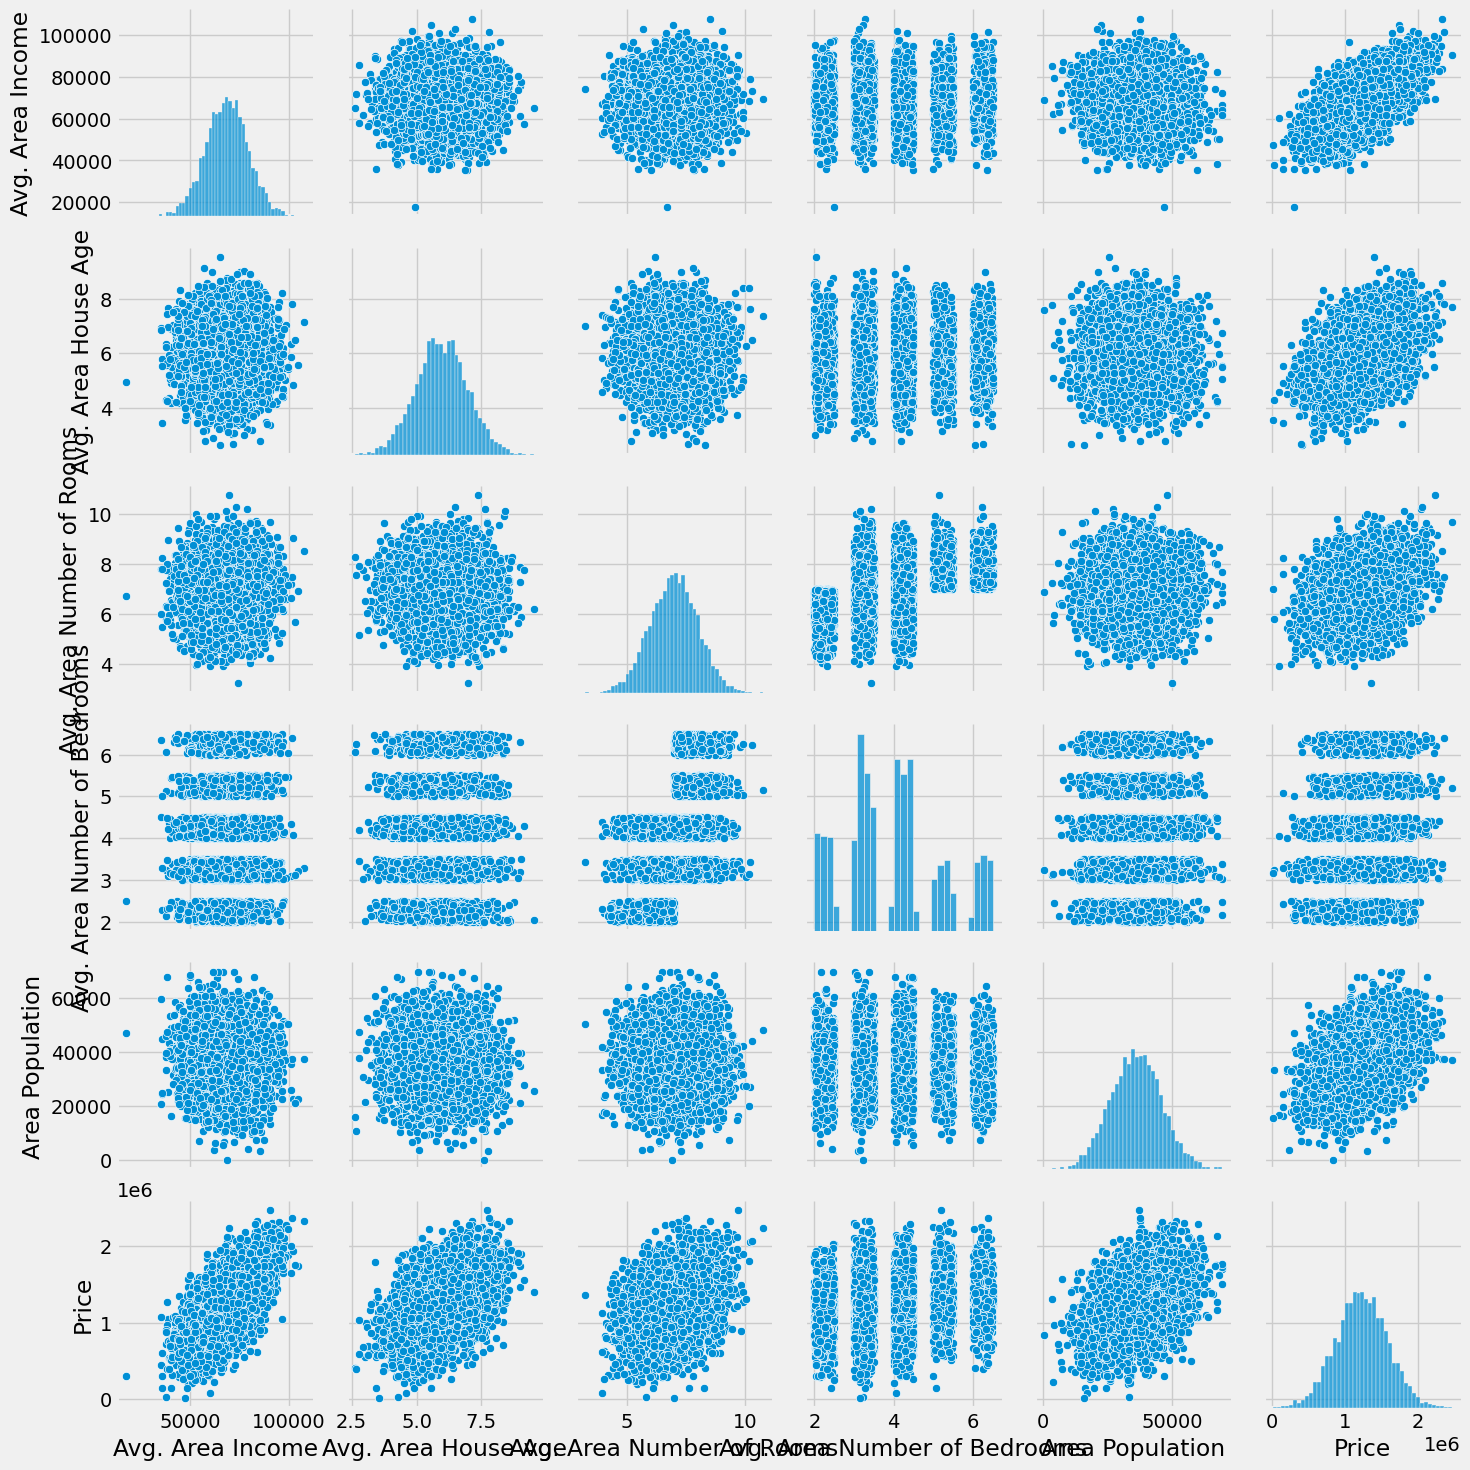

In [98]:
sb.pairplot(data = df)

**Distribution of price (the predicted quantity)**

**Correlation matrix and heatmap**

In [99]:
train_df = df.copy().drop('Address', axis= 1)
le = preprocessing.LabelEncoder()

for name in train_df.columns:
    if train_df[name].dtype == 'object':  
        train_df[name] = train_df[name].astype(str)
        le.fit(train_df[name])
        train_df[name] = le.transform(train_df[name])

integer_columns = train_df.select_dtypes(include='int')

train_df[integer_columns.columns] = (integer_columns - integer_columns.min()) / (integer_columns.max() - integer_columns.min())

In [100]:
train_df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<Axes: >

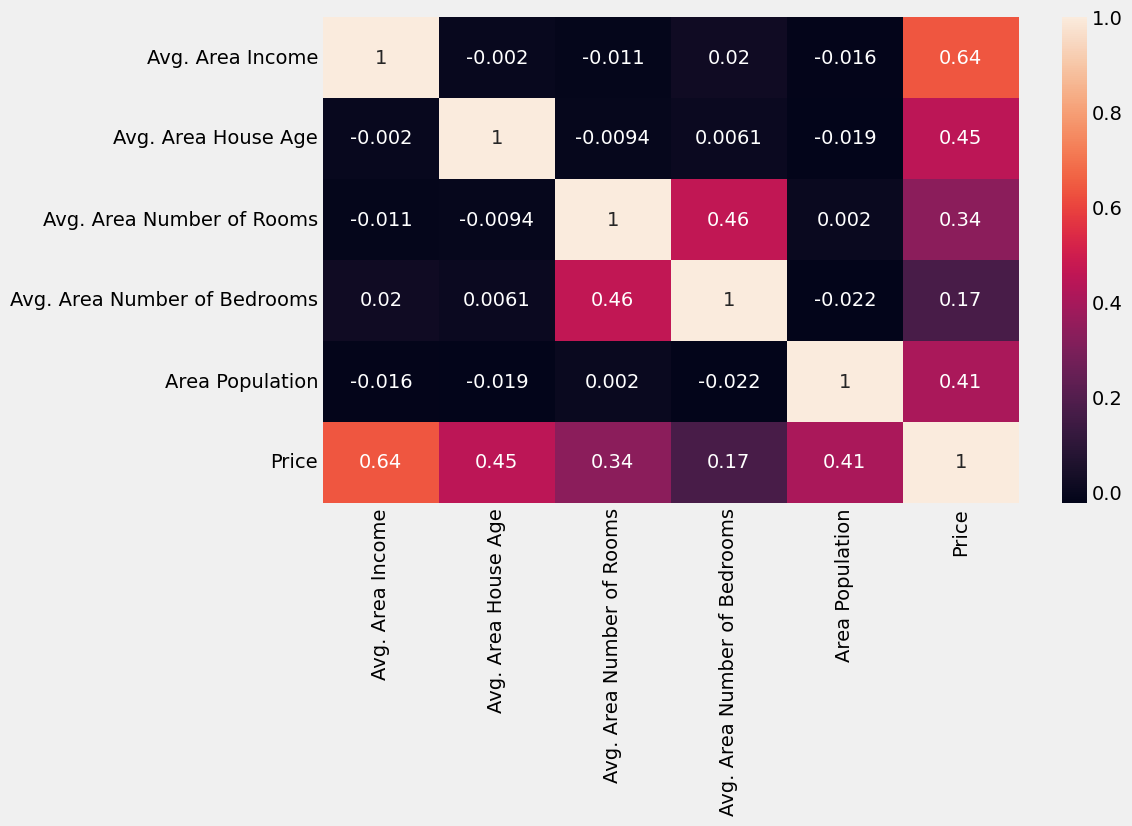

In [101]:
sb.heatmap(train_df.corr(), annot=True)

### Feature and variable sets

**Make a list of data frame column names**

In [102]:
Columns_list = list(df_train.columns)
Columns_list

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population',
 'Price',
 'Address']

**Put all the numerical features in X and Price in y, ignore Address which is string for linear regression**

In [103]:
X = train_df.drop(['Price'], axis = 1)


In [104]:
y = train_df['Price']


### Test-train split

**Create X and y train and test splits in one command using a split ratio and a random seed**

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Check the size and shape of train/test splits (it should be in the ratio as per test_size parameter above)**

In [106]:
X_train.size, X_train.shape

(20000, (4000, 5))

In [107]:
y_train.size, y_train.shape

(4000, (4000,))

In [108]:
X_test.size, X_train.shape

(5000, (4000, 5))

In [109]:
y_test.size, y_test.shape

(1000, (1000,))

### Model fit and training

In [110]:
lr = linear_model.LinearRegression()

**Fit the model on to the instantiated object itself**

In [111]:
model = lr.fit(X_train, y_train)

**Check the intercept and coefficients and put them in a DataFrame**

In [112]:
model.coef_

array([2.16522058e+01, 1.64666481e+05, 1.19624012e+05, 2.44037761e+03,
       1.52703134e+01])

In [113]:
model.intercept_

np.float64(-2635072.9009320335)

In [114]:
coefficients = pd.DataFrame(np.array(model.coef_ + model.intercept_))
coefficients

,0
0,-2.635051e+06
1,-2.470406e+06
2,-2.515449e+06
3,-2.632633e+06
4,-2.635058e+06


### Calculation of standard errors and t-statistic for the coefficients

In [115]:
predictions = model.predict(X_test)

In [116]:
print ('MAE is:', mean_absolute_error(y_test, predictions))

MAE is: 80879.09723488029


In [117]:
print ('MSE is:', mean_squared_error(y_test, predictions))

MSE is: 10089009300.892078


In [118]:
print ('RMSE is:', sqrt(mean_squared_error(y_test, predictions)))

RMSE is: 100444.0605555753


In [122]:
print(model.score(X,y))

0.9179987716782456


**R-square of the model fit**

In [ ]:
##

### Prediction, error estimate, and regression evaluation matrices

**Prediction using the lm model**

In [123]:
predictions = model.predict(X_test)

**Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line**

In [ ]:
##

**Plotting histogram of the residuals i.e. predicted errors (expect a normally distributed pattern)**

In [ ]:
##

**Scatter plot of residuals and predicted values (Homoscedasticity)**

In [ ]:
##

**Regression evaluation metrices**

In [ ]:
##

**R-square value**

In [ ]:
##